In [ ]:
EDA Assignment_IPL Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('IPL_Dataset.csv')
df

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,100,50,4s,6s
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,129,Khaleel Ahmed,7,1,0,0,0*,0.00,2,0.00,0,0,0,0
129,130,Arshdeep Singh,8,1,0,0,0*,0.00,3,0.00,0,0,0,0
130,131,Daniel Sams,3,1,0,0,0*,0.00,2,0.00,0,0,0,0
131,132,Shreevats Goswami,2,2,0,0,0*,0.00,4,0.00,0,0,0,0


In [5]:
df.isnull().sum()

Jersey No        0
Player           0
Matches          0
Inns             0
Not Out          0
Runs             0
Highest Score    0
Avg              0
Balls faced      0
Strike rate      0
100              0
50               0
4s               0
6s               0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Jersey No      133 non-null    int64  
 1   Player         133 non-null    object 
 2   Matches        133 non-null    int64  
 3   Inns           133 non-null    int64  
 4   Not Out        133 non-null    int64  
 5   Runs           133 non-null    int64  
 6   Highest Score  133 non-null    object 
 7   Avg            133 non-null    float64
 8   Balls faced    133 non-null    int64  
 9   Strike rate    133 non-null    float64
 10  100            133 non-null    int64  
 11  50             133 non-null    int64  
 12  4s             133 non-null    int64  
 13  6s             133 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 14.7+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Jersey No,133.0,67.000000,38.537860,1.0,34.00,67.00,100.0,133.00
Matches,133.0,9.631579,4.893523,1.0,5.00,10.00,14.0,17.00
Inns,133.0,6.631579,5.030925,1.0,2.00,5.00,11.0,17.00
Not Out,133.0,1.616541,1.550766,0.0,0.00,1.00,2.0,7.00
Runs,133.0,139.157895,167.293103,0.0,10.00,59.00,232.0,670.00
Avg,133.0,19.366241,18.053343,0.0,6.00,15.00,29.9,101.00
Balls faced,133.0,105.714286,122.253870,1.0,12.00,53.00,169.0,518.00
Strike rate,133.0,107.364737,44.584031,0.0,88.75,116.84,137.5,191.42
100,133.0,0.037594,0.227170,0.0,0.00,0.00,0.0,2.00
50,133.0,0.827068,1.351269,0.0,0.00,0.00,1.0,5.00


In [6]:
df.columns

Index(['Jersey No', 'Player', 'Matches', 'Inns', 'Not Out', 'Runs',
       'Highest Score', 'Avg', 'Balls faced', 'Strike rate', '100', '50', '4s',
       '6s'],
      dtype='object')

In [ ]:
Q1. What is the maximum number of matches played by an individual player in a season? Print the player name along with the number of matched played?

In [4]:
max_matches = df.groupby('Player')['Matches'].max()
max_matches

Player
ABD Villiers         15
Aaron Finch          12
Abdul Samad          12
Abhishek Sharma       8
Ajinkya Rahane        9
                     ..
Virat Kohli          15
Washington Sundar    15
Wriddhiman Saha       4
Yashasvi Jaiswal      3
Yuzvendra Chahal     15
Name: Matches, Length: 133, dtype: int64

In [ ]:
Q2 Top 2 players with maximum Average who have scored atleast 2 half centuries ?

In [11]:
df1 = df[df["50"]>= 2]
top_players = df1.sort_values('Avg', ascending=False).head(2)
top_players

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,100,50,4s,6s
36,37,Wriddhiman Saha,4,4,1,214,87,71.33,153,139.86,0,2,24,5
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30


In [ ]:
Q3 Create 2 new columns based on Player name. First column will have first name and second column will have last name. 
Eg: for the player Shikhar Dhawan, Shikhar will be the first name and Dhawan will be the last name.

In [31]:
df[['First_Name', 'Last_Name']] = df['Player'].apply(lambda x: pd.Series(x.split(' ', 1)))
print(df[['First_Name', 'Last_Name']].head())

  First_Name Last_Name
0         KL     Rahul
1    Shikhar    Dhawan
2      David    Warner
3    Shreyas      Iyer
4      Ishan    Kishan


In [ ]:
Q4 Create a new column (Cleaned_Highest_score) based on Highest score variable. 
Remove the Asterik(*) mark and convert the data type into INT.

In [44]:
df['Cleaned_Highest_score'] = df['Highest Score'].str.replace('*', '', regex=False).astype(int)
print(df[['Highest Score', 'Cleaned_Highest_score']])

    Highest Score  Cleaned_Highest_score
0            132*                    132
1            106*                    106
2             85*                     85
3             88*                     88
4              99                     99
..            ...                    ...
128            0*                      0
129            0*                      0
130            0*                      0
131            0*                      0
132            0*                      0

[133 rows x 2 columns]


In [ ]:
Q5 Print the total number of centuries scored in the entire season

In [56]:
centuries_count = df['100'].sum()
centuries_count 

5

In [ ]:
Q6 Print all the player names whose strike rate is less than the average strike rate of all players in entire season. 
Print the player name, his strike rate and average strike rate

In [97]:
Avg_Strike_rate=df['Strike rate'].mean()
Below_Avg_Strike_rate=df[df['Strike rate']<Avg_Strike_rate]
Below_Avg_Strike_rate['Avg_Strike_rate']=Avg_Strike_rate
print(Below_Avg_Strike_rate[['Player', 'Strike rate', 'Avg_Strike_rate']])

                  Player  Strike rate  Avg_Strike_rate
51        Ajinkya Rahane       105.60       107.364737
55         Glenn Maxwell       101.88       107.364737
58         Vijay Shankar       101.04       107.364737
61         Josh Philippe       101.29       107.364737
62       Gurkeerat Singh        88.75       107.364737
65          Kedar Jadhav        93.93       107.364737
70      Yashasvi Jaiswal        90.90       107.364737
71         Shreyas Gopal        94.87       107.364737
77          Murali Vijay        74.41       107.364737
79          Chris Jordan        93.54       107.364737
80         Navdeep Saini       100.00       107.364737
82     Kamlesh Nagarkoti        70.96       107.364737
84         Harshal Patel        87.50       107.364737
85         Jimmy Neesham       105.55       107.364737
86            Tom Banton        90.00       107.364737
89     Prabhsimran Singh       100.00       107.364737
92         Kuldeep Yadav        61.90       107.364737
94        

C:\Users\amiglani\AppData\Local\Temp\ipykernel_12884\1924471840.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Below_Avg_Strike_rate['Avg_Strike_rate']=Avg_Strike_rate


In [ ]:
Q7. Please check the correlation between the features and create a heat map.

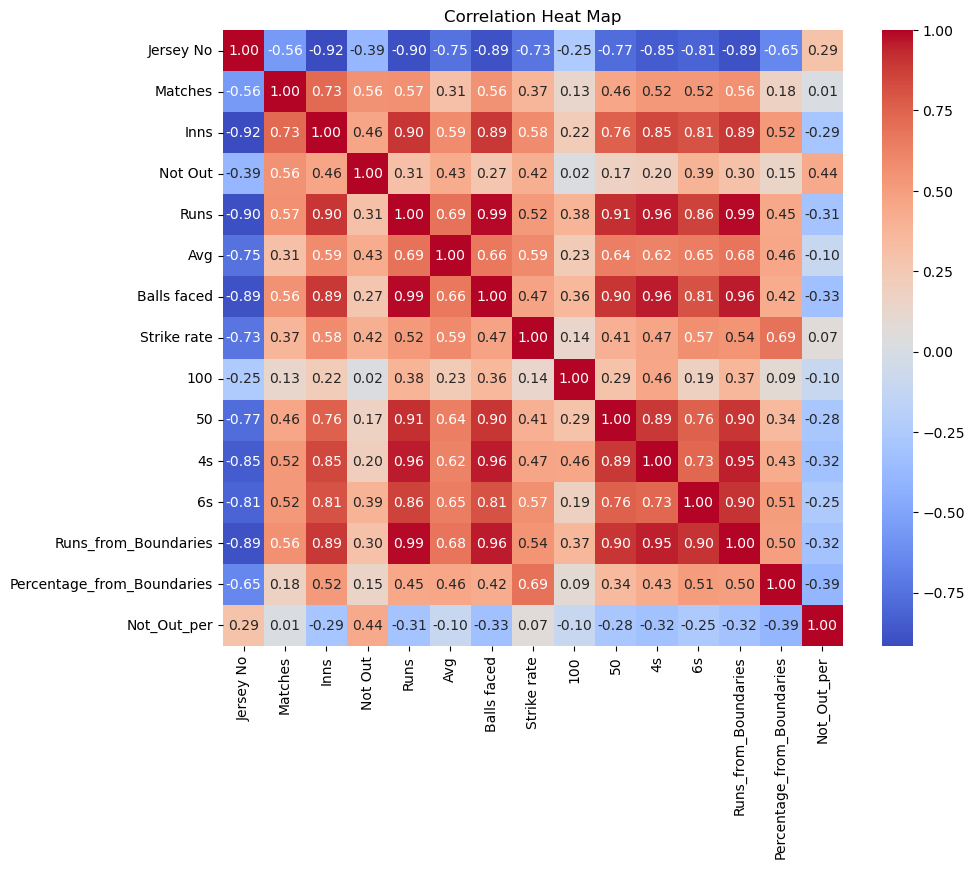

In [40]:
num_df=df.select_dtypes(include=['float64','int64'])
correlation_matrix=num_df.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f') 
plt.title('Correlation Heat Map') 
plt.show()

In [ ]:
Q8. Check the list of players who has an average greater than 50 as well strike rate above 120. Print player name, average and strike rate.

In [116]:
df1=df[(df['Avg']>= 50) & (df['Strike rate']>= 120)]
print(df1[['Player', 'Avg', 'Strike rate']])

             Player     Avg  Strike rate
0          KL Rahul   55.83       129.34
4      Ishan Kishan   57.33       145.76
31   Kieron Pollard   53.60       191.42
36  Wriddhiman Saha   71.33       139.86
37  Ruturaj Gaikwad   51.00       120.71
57     Deepak Hooda  101.00       142.25
60       Tom Curran   83.00       133.87


In [ ]:
Q9. Please check the list of players who has an average greater than 40 and balls faced above 100. Print player name, average and balls faced.

In [117]:
df1=df[(df['Avg']>= 40) & (df['Balls faced']>= 100)]
print(df1[['Player', 'Avg', 'Balls faced']])

              Player    Avg  Balls faced
0           KL Rahul  55.83          518
1     Shikhar Dhawan  44.14          427
4       Ishan Kishan  57.33          354
6   Suryakumar Yadav  40.00          331
8        Virat Kohli  42.36          384
9       ABD Villiers  45.40          286
10     Faf Duplessis  40.81          319
14       Eoin Morgan  41.80          302
24   Kane Williamson  45.28          237
27       Chris Gayle  41.14          210
28        Ben Stokes  40.71          200
31    Kieron Pollard  53.60          140
32     Rahul Tewatia  42.50          183
33   Ravindra Jadeja  46.40          135
36   Wriddhiman Saha  71.33          153
37   Ruturaj Gaikwad  51.00          169


In [ ]:
Q10. Players who scored atleast one century in this season. Create visualization.

            Player  100
0         KL Rahul    1
1   Shikhar Dhawan    2
13  Mayank Agarwal    1
28      Ben Stokes    1


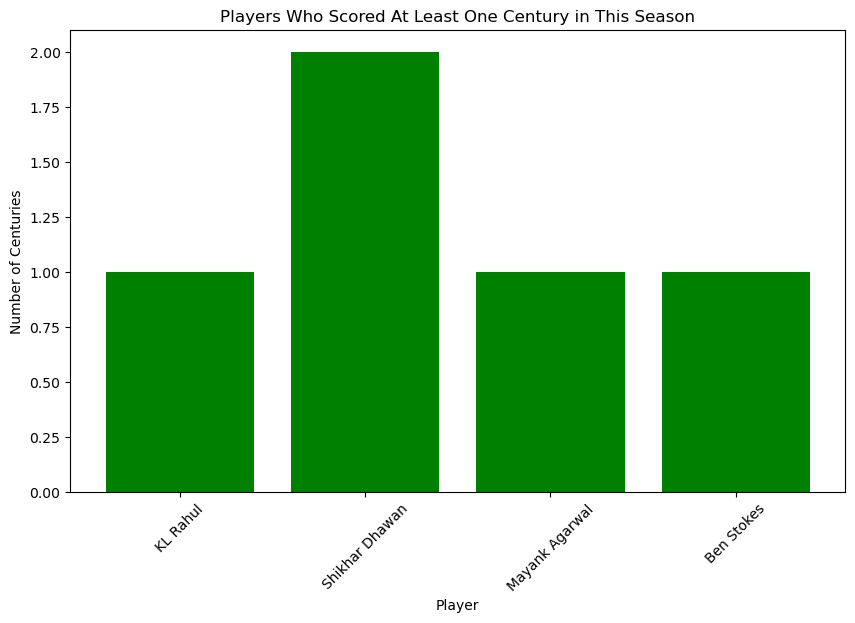

In [92]:
df1 = df[df["100"]>= 1]
print(df1[['Player','100']])
plt.figure(figsize=(10, 6)) 
plt.bar(df1['Player'], df1['100'], color='Green') 
plt.xlabel('Player') 
plt.ylabel('Number of Centuries') 
plt.title('Players Who Scored At Least One Century in This Season') 
plt.xticks(rotation=45) 
plt.show()

In [ ]:
Q11. Players who scored atleast 4 half centuries in this season.

In [86]:
df1 = df[df["50"]>= 4]
print(df1[['Player','50']])

              Player  50
0           KL Rahul   5
1     Shikhar Dhawan   4
2       David Warner   4
4       Ishan Kishan   4
5       Quinton Kock   4
6   Suryakumar Yadav   4
7   Devdutt Padikkal   5
9       ABD Villiers   5
10     Faf Duplessis   4


In [ ]:
Q12. Check the list of players who hit more than 45 boundaries and more than 10 sixes in this season.

In [118]:
df1=df[(df['4s']>= 45) & (df['6s']>= 10)]
print(df1[['Player', '4s', '6s']])

             Player  4s  6s
0          KL Rahul  58  23
1    Shikhar Dhawan  67  12
2      David Warner  52  14
5      Quinton Kock  46  22
6  Suryakumar Yadav  61  11


In [ ]:
Q13. Plot a histogram of number of matches played in a season by players.

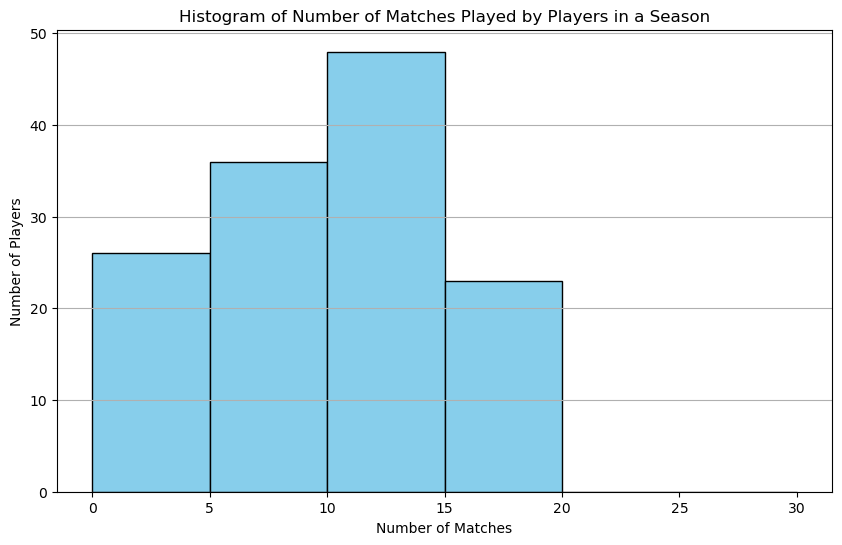

In [29]:
plt.figure(figsize=(10, 6)) 
plt.hist(df['Matches'], bins=range(0, 31, 5), edgecolor='black', color='skyblue') 
plt.xlabel('Number of Matches') 
plt.ylabel('Number of Players') 
plt.title('Histogram of Number of Matches Played by Players in a Season')
plt.xticks(range(0, 31, 5)) 
plt.grid(axis='y')
plt.show()

In [ ]:
Q14. Plot the histogram of balls faced by players.

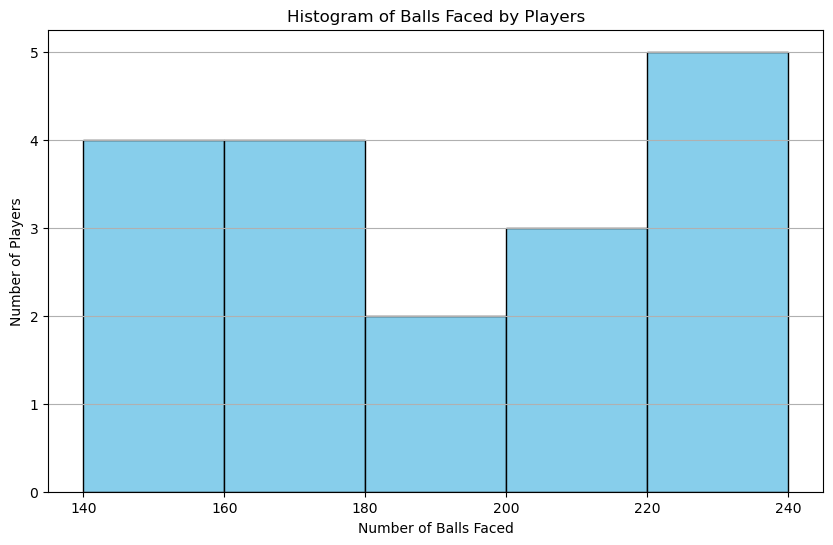

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(df['Balls faced'], bins=range(140, 241, 20), edgecolor='black', color='skyblue')
plt.xlabel('Number of Balls Faced')
plt.ylabel('Number of Players')
plt.title('Histogram of Balls Faced by Players')
plt.xticks(range(140, 241, 20))
plt.grid(axis='y')
plt.show()

In [ ]:
Q15. Top 10 players with most runs in a season.

In [8]:
df1=df.sort_values(by='Runs',ascending=False)
top_10=df1.head(11)
print(top_10[['Player','Runs']])

              Player  Runs
0           KL Rahul   670
1     Shikhar Dhawan   618
2       David Warner   548
3       Shreyas Iyer   519
4       Ishan Kishan   516
5       Quinton Kock   503
6   Suryakumar Yadav   480
7   Devdutt Padikkal   473
8        Virat Kohli   466
9       ABD Villiers   454
10     Faf Duplessis   449


In [ ]:
Q16. Print the players who played the match but didn't get the batting.

In [17]:
players_not_bat = df[df['Inns'] == 0]
print(players_not_bat[['Player','Inns']])

Empty DataFrame
Columns: [Player, Inns]
Index: []


In [ ]:
17. Create a new column to show the percentage of total runs scored in 4s and 6s. Then print the top 5 players with maximum percentage.

In [26]:
df['Runs_from_Boundaries'] = df['4s'] * 4 + df['6s'] *6
df['Percentage_from_Boundaries'] = (df['Runs_from_Boundaries'] / df['Runs']) *100
top_5_players = df.sort_values(by='Percentage_from_Boundaries', ascending=False).head(6)
print(top_5_players[['Player','Percentage_from_Boundaries']])

            Player  Percentage_from_Boundaries
109     Andrew Tye                  100.000000
48   Andre Russell                   76.923077
74    Chris Morris                   76.470588
29   Hardik Pandya                   73.309609
47    Sunil Narine                   72.727273
97   Mohammad Nabi                   72.727273


In [ ]:
Q18. Print the players with top 5 Not out percentages (Not Out percentage can be calculated as number of Not outs divided by Innings).

In [27]:
df['Not_Out_per'] = df['Not Out']/df['Inns']*100
top_5_players = df.sort_values(by='Not_Out_per', ascending=False).head(6)
print(top_5_players[['Player','Not_Out_per']])

              Player  Not_Out_per
122    Shahbaz Ahmed        100.0
97     Mohammad Nabi        100.0
114      T Natarajan        100.0
116     Rahul Chahar        100.0
113  Dhawal Kulkarni        100.0
68   Lockie Ferguson        100.0


In [ ]:
Q19. Create visualization of top 10 players with highest number of sixes.

<Figure size 1200x600 with 0 Axes>

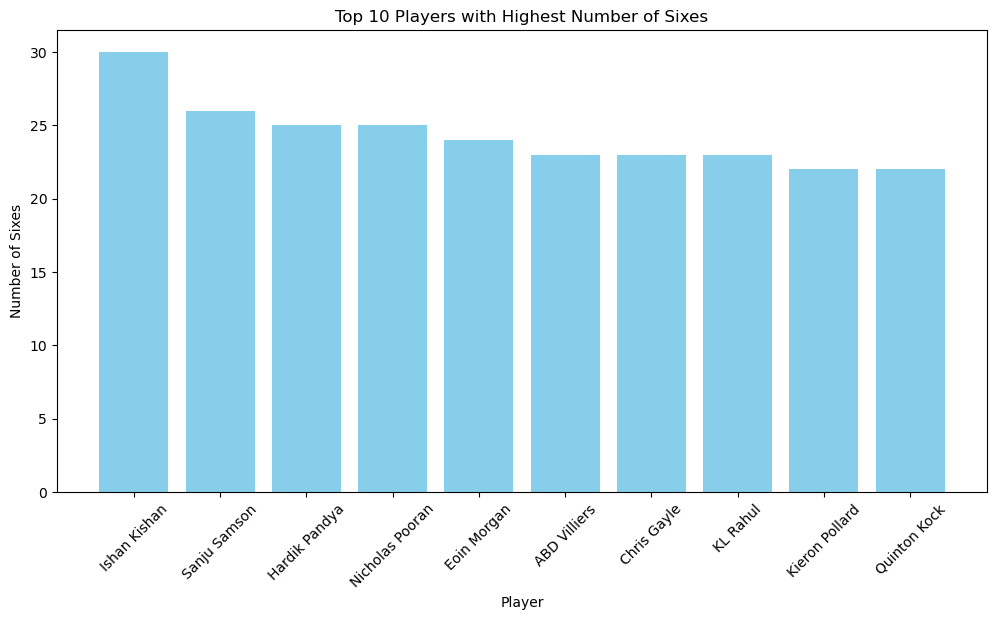

In [33]:
top_10_six_hitters = df.sort_values(by='6s', ascending=False).head(10)
plt.figure(figsize=(12, 6)) 
plt.bar(top_10_six_hitters['Player'], 
top_10_six_hitters['6s'], 
color='skyblue') 
plt.xlabel('Player') 
plt.ylabel('Number of Sixes') 
plt.title('Top 10 Players with Highest Number of Sixes') 
plt.xticks(rotation=45) 
plt.show()

In [ ]:
Q20. Scatter plot of runs scored by a player v/s balls faced in a season. Then find the relationship between these 2 variables.

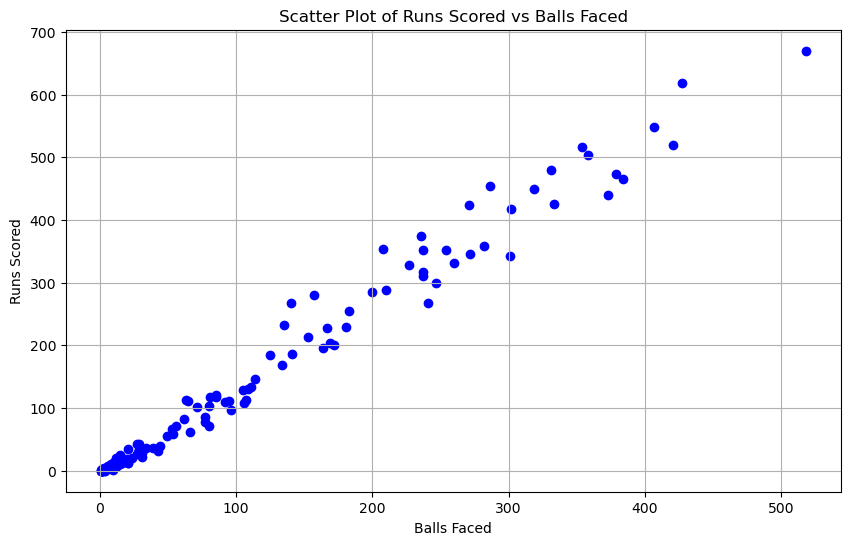

In [34]:
plt.figure(figsize=(10, 6)) 
plt.scatter(df['Balls faced'], df['Runs'], color='blue') 
plt.xlabel('Balls Faced') 
plt.ylabel('Runs Scored') 
plt.title('Scatter Plot of Runs Scored vs Balls Faced') 
plt.grid(True) 
plt.show()